In [1]:
import numpy as np,pandas as pd,seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv("creditcard.csv")

# Dataset description

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Handling missing values

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Handling duplicate values

In [8]:
df.duplicated().sum()

1081

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(283726, 31)

### here after dropping the duplicate rows the number of rows got reduced from 284807 to 283726 (1081 rows)

# Handling outliers

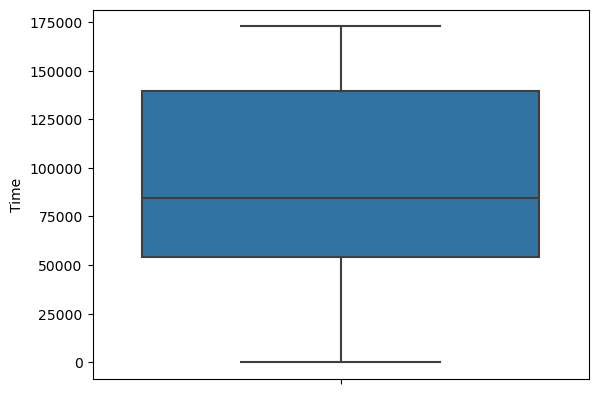

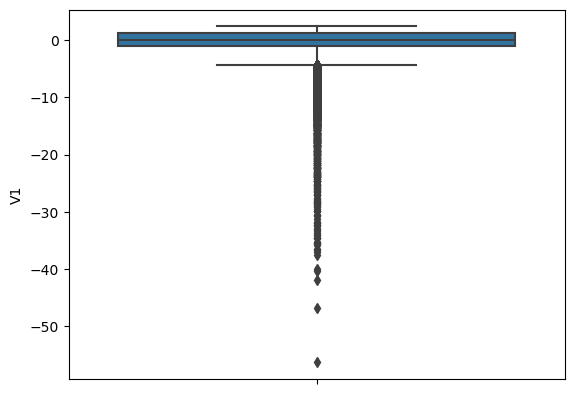

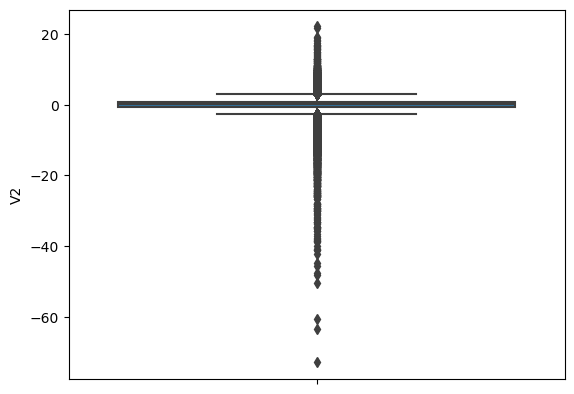

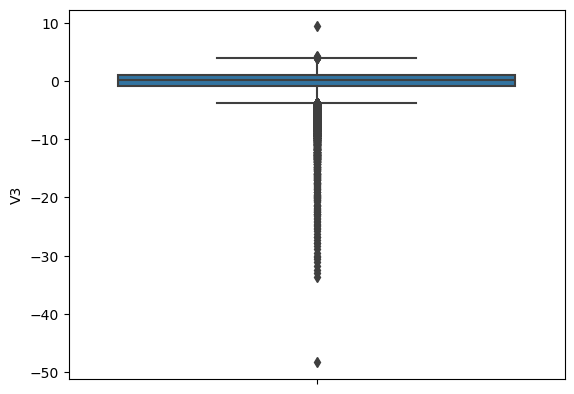

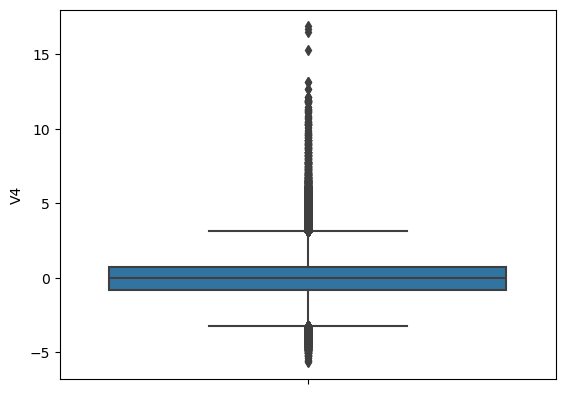

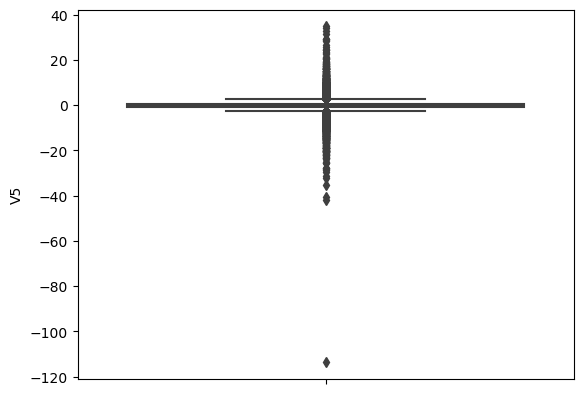

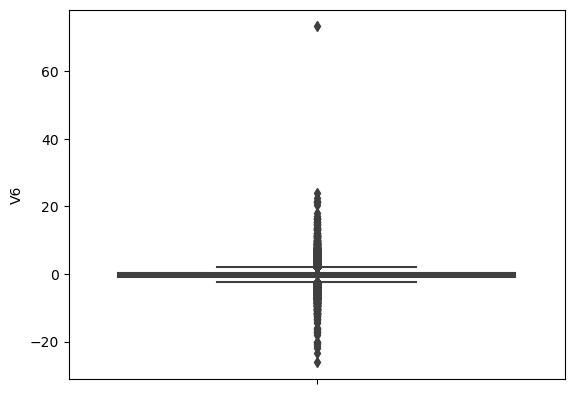

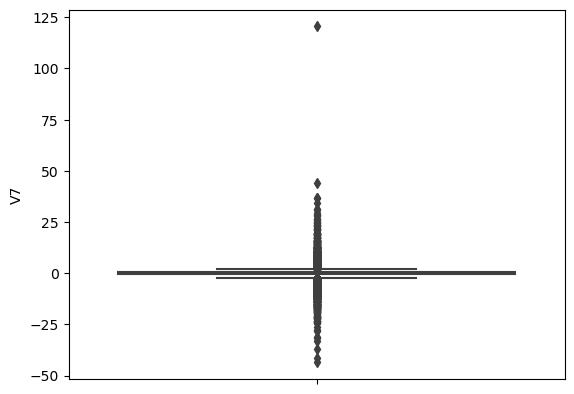

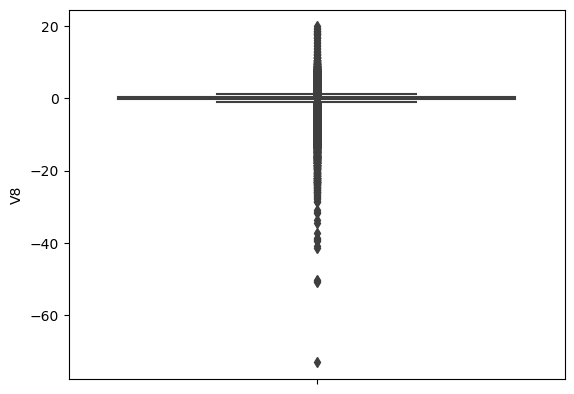

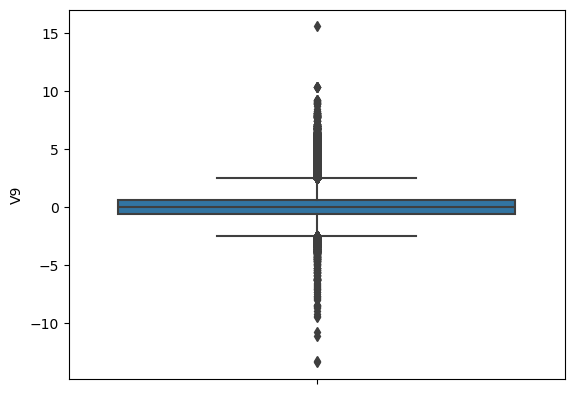

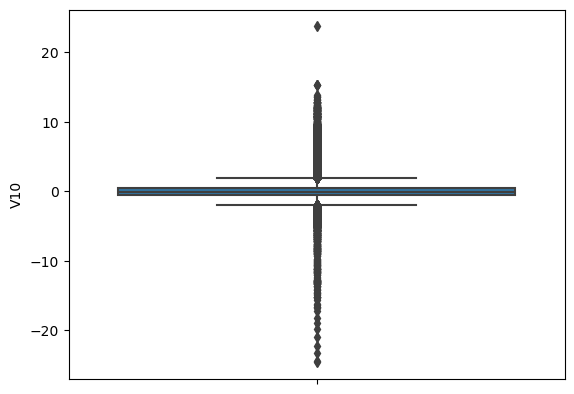

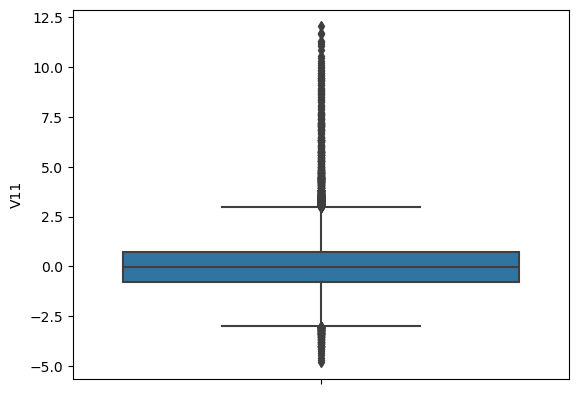

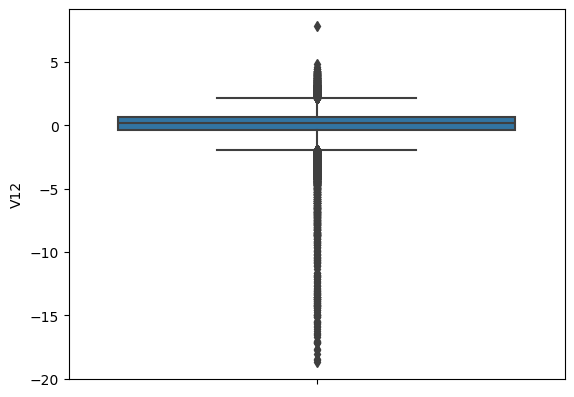

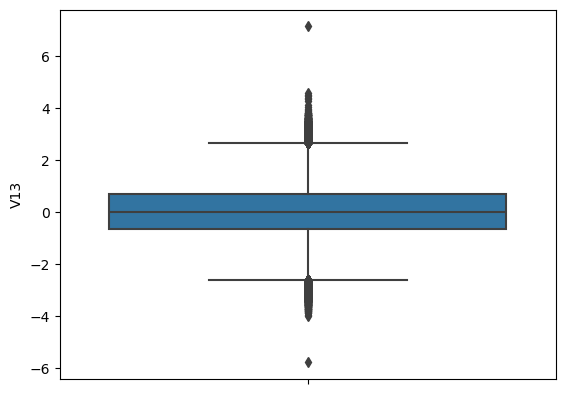

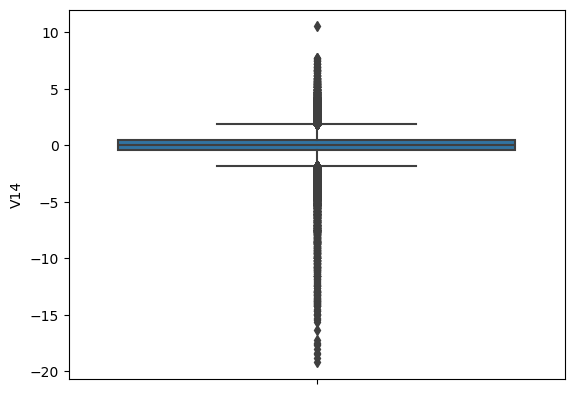

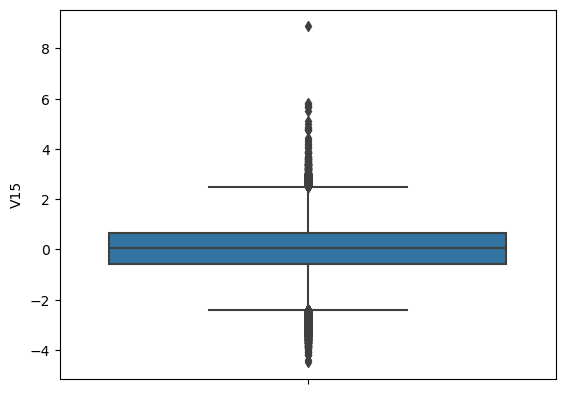

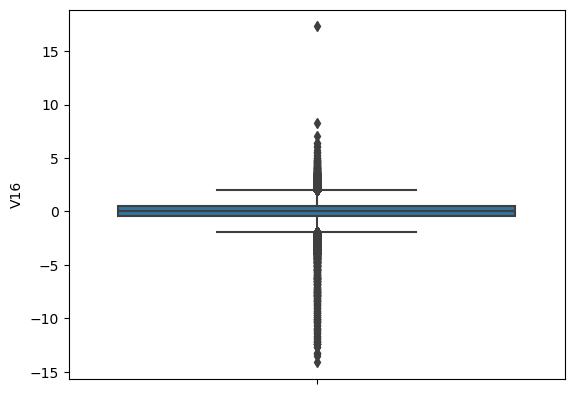

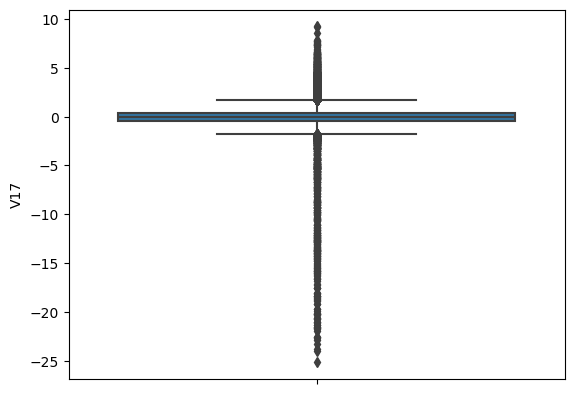

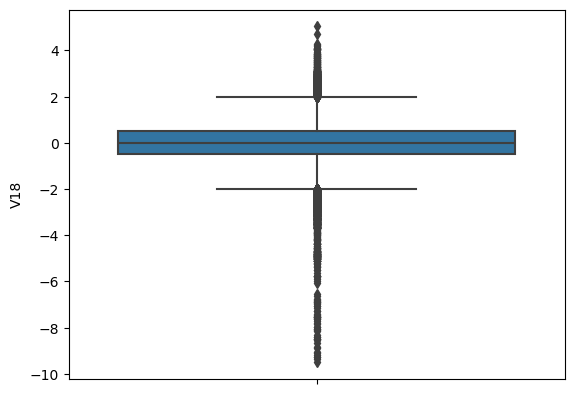

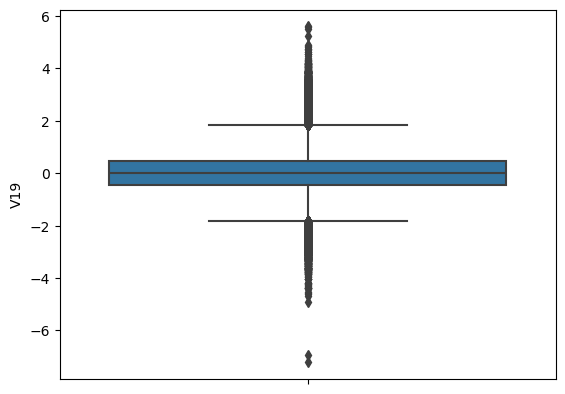

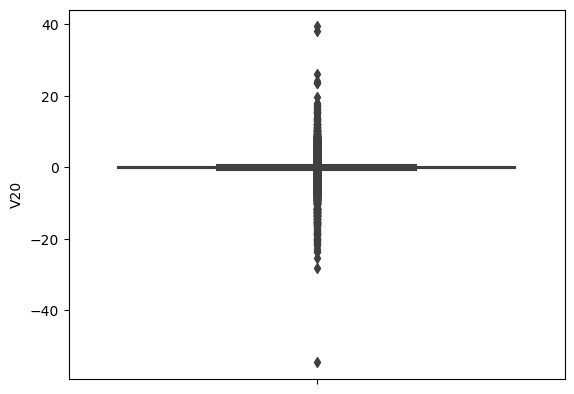

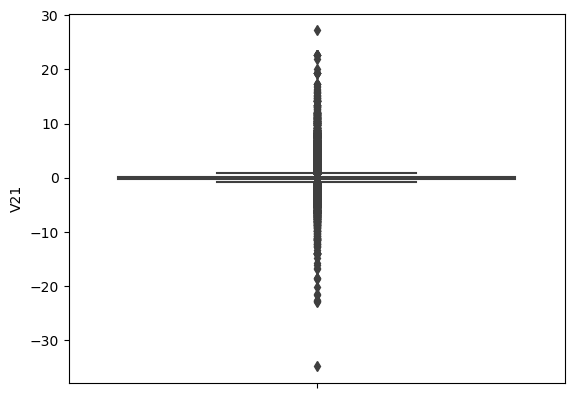

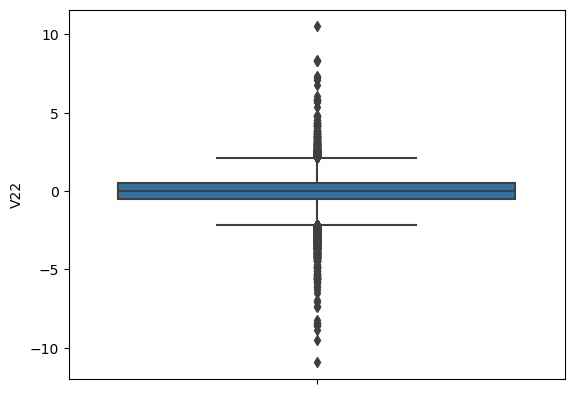

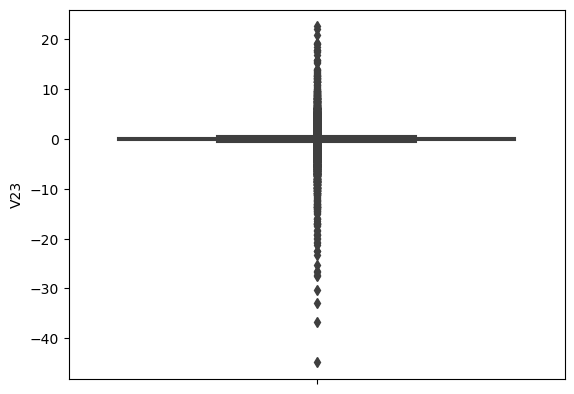

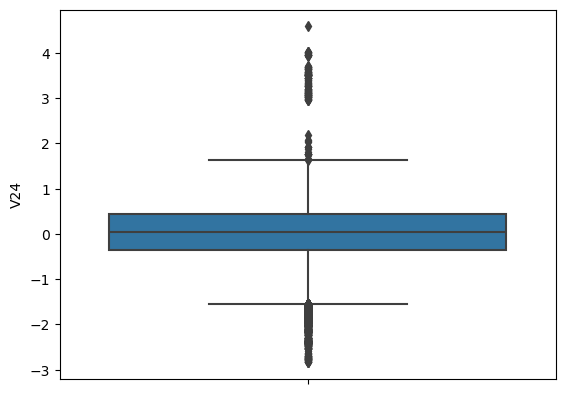

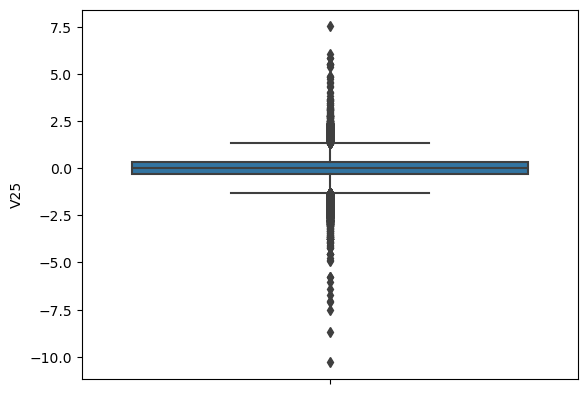

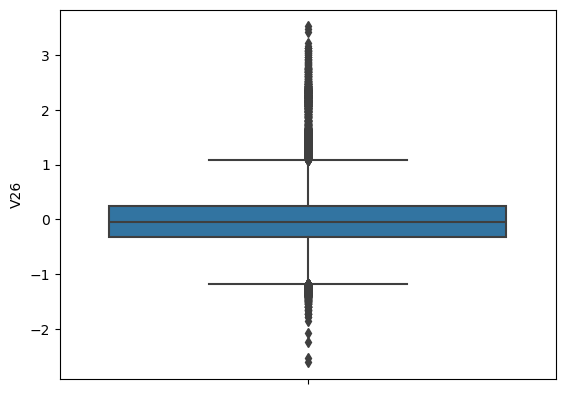

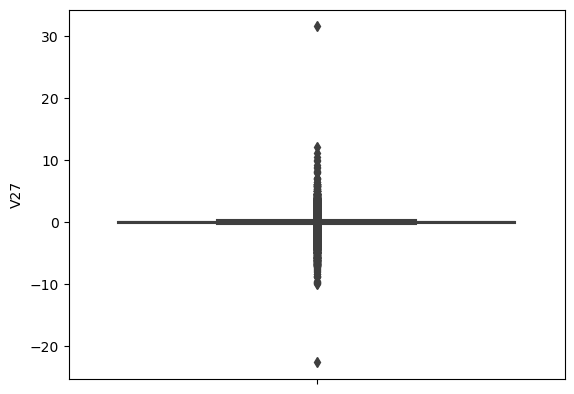

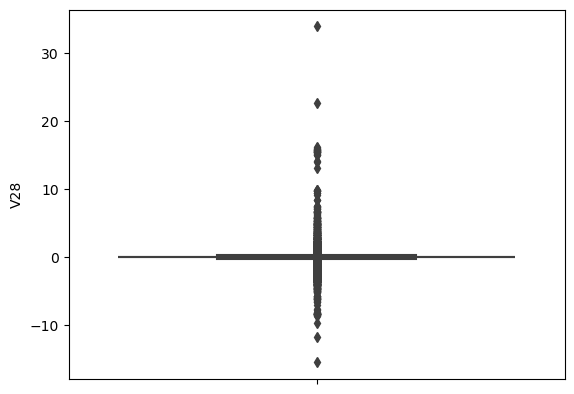

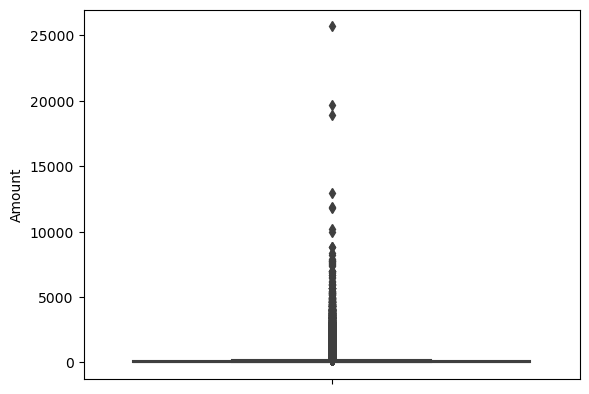

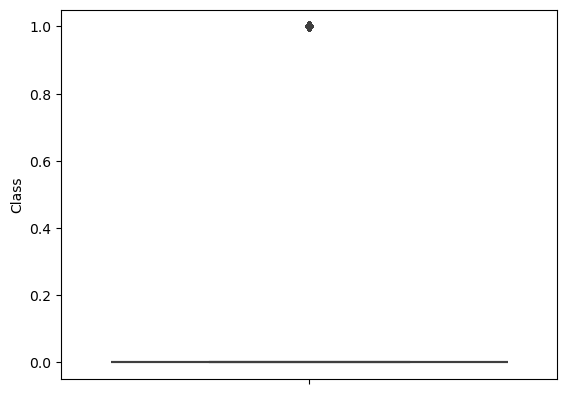

In [12]:
for i in df:
    sns.boxplot(y=df[i])
    plt.show()

### below is the function to remove the outtliers

In [13]:
def rem_out(c):
    sorted(c)
    q1,q3=c.quantile([0.25,0.75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur

In [14]:
a = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
for i in a:
    l,u=rem_out(df[i])
    df[i]=np.where(df[i]>u,u,df[i])
    df[i]=np.where(df[i]<l,l,df[i])

### after removal: -

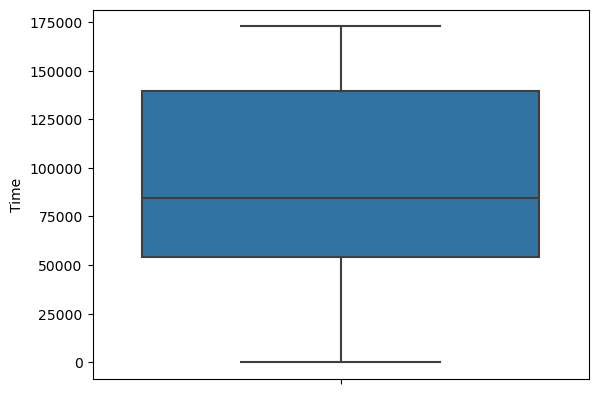

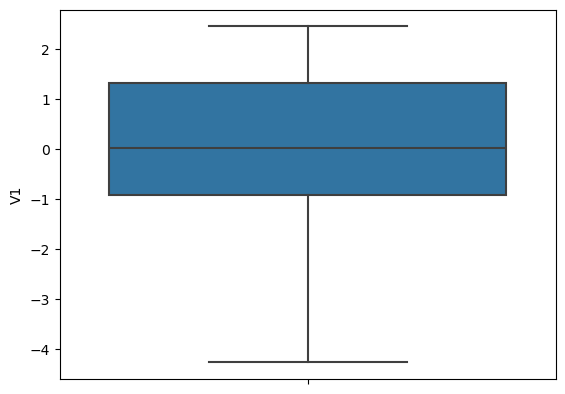

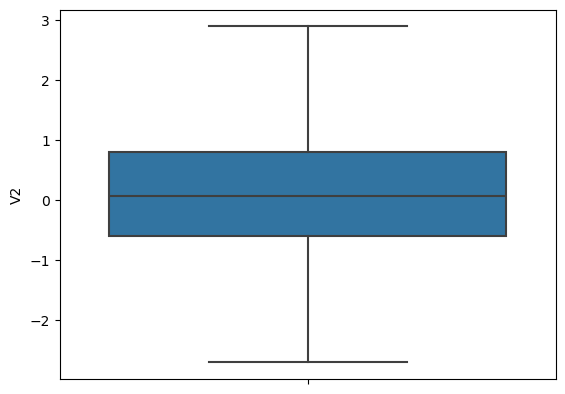

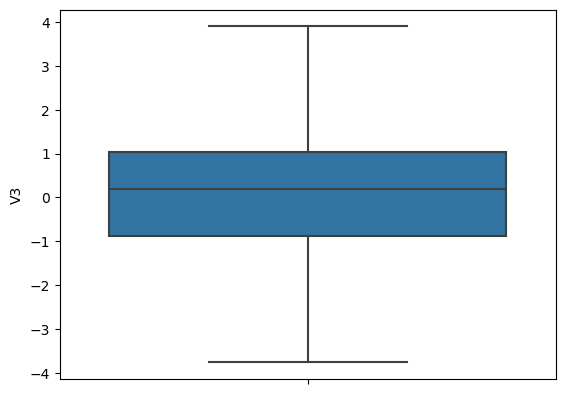

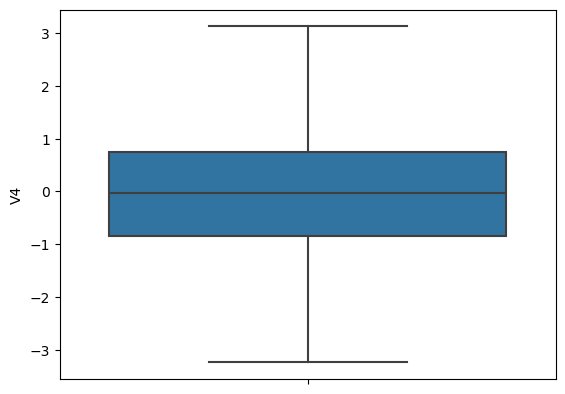

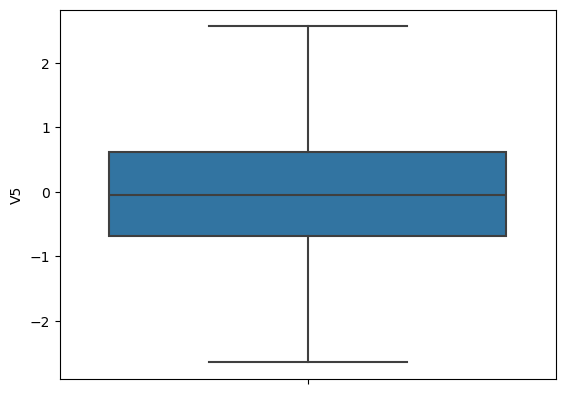

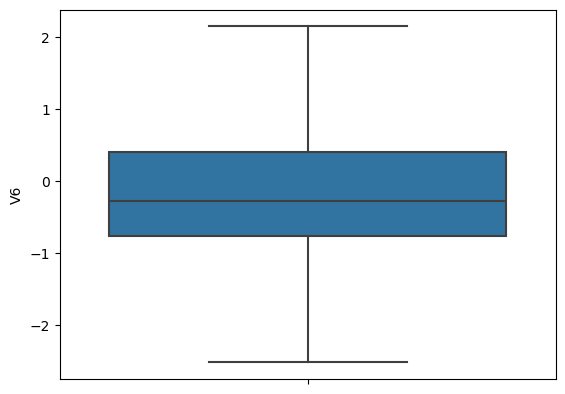

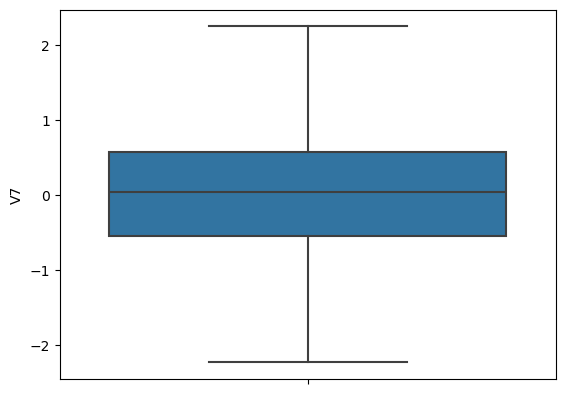

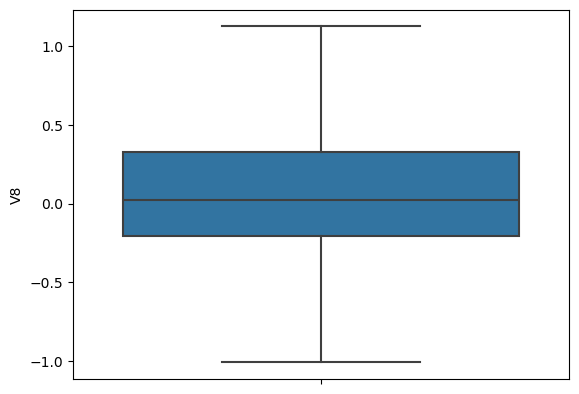

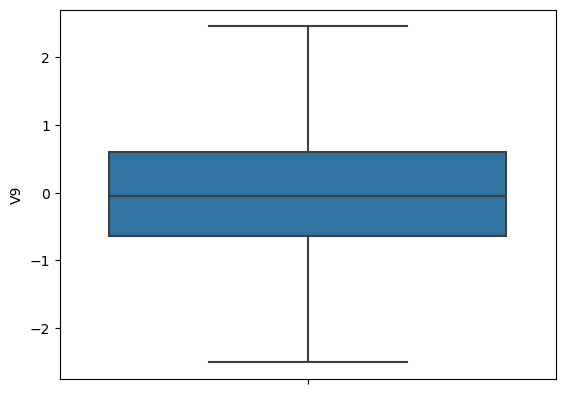

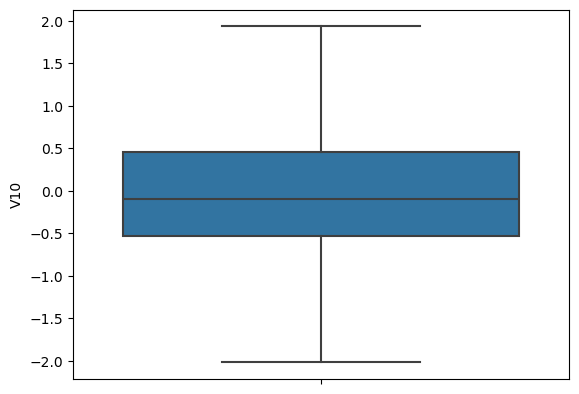

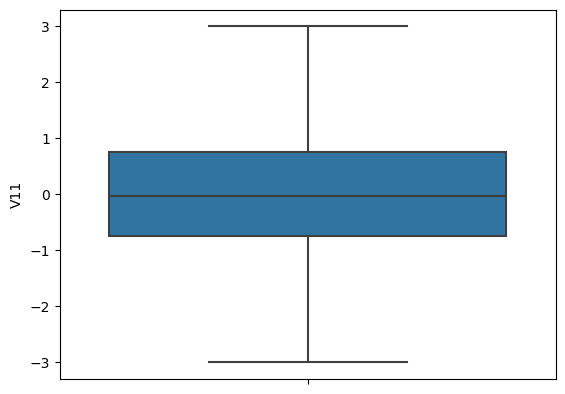

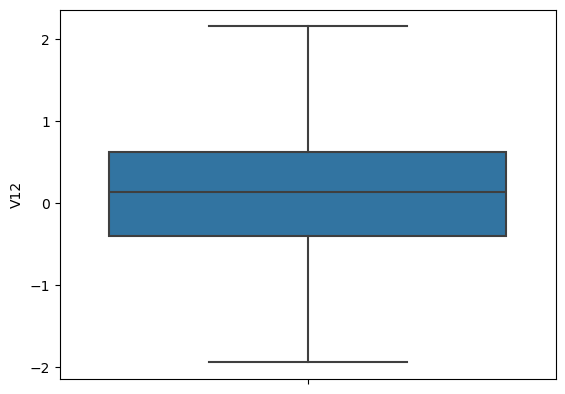

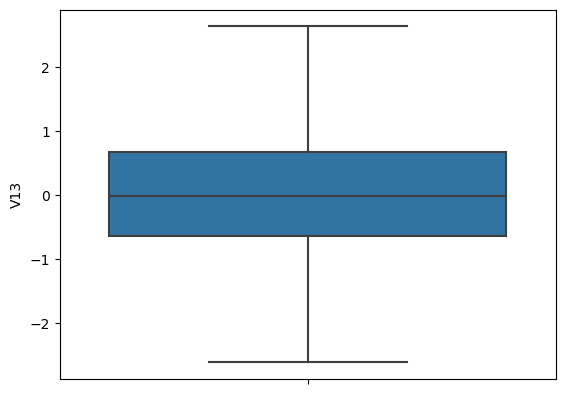

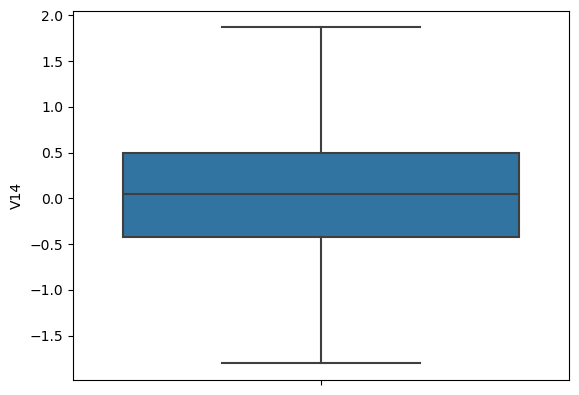

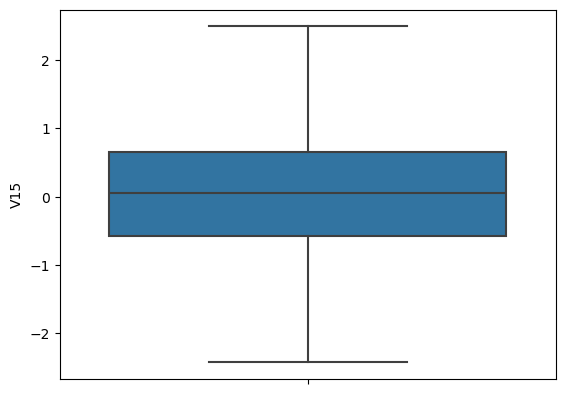

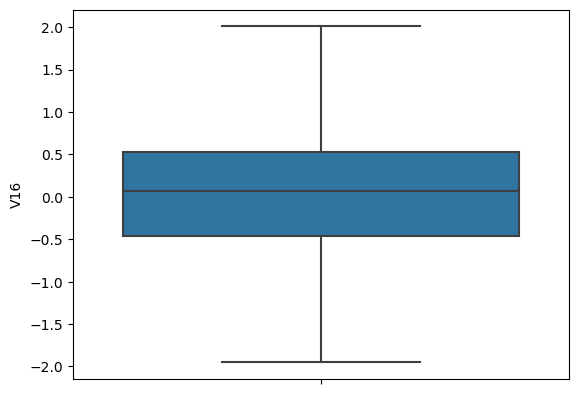

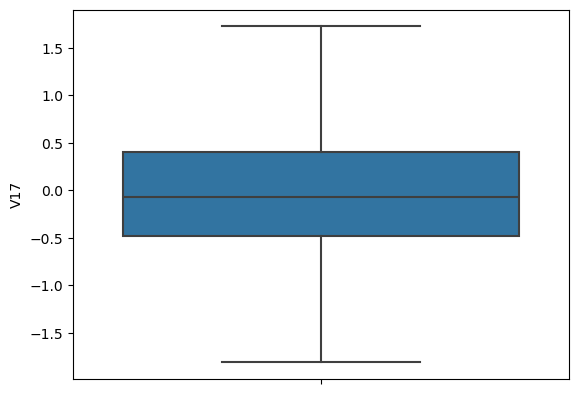

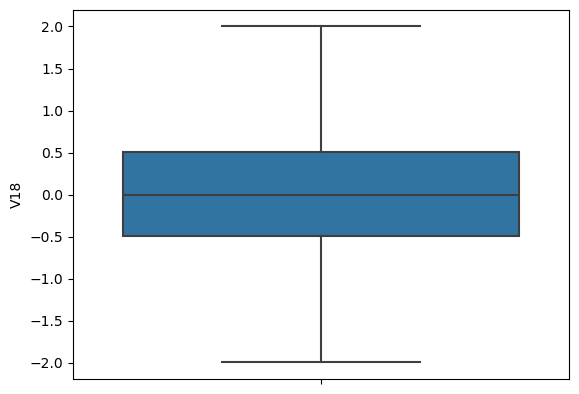

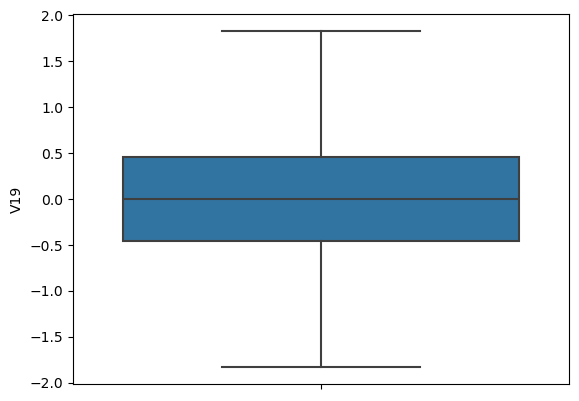

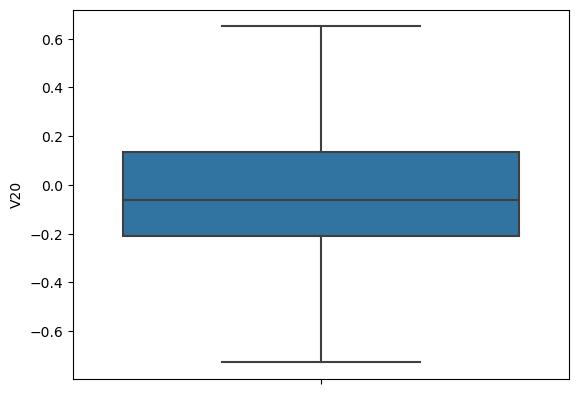

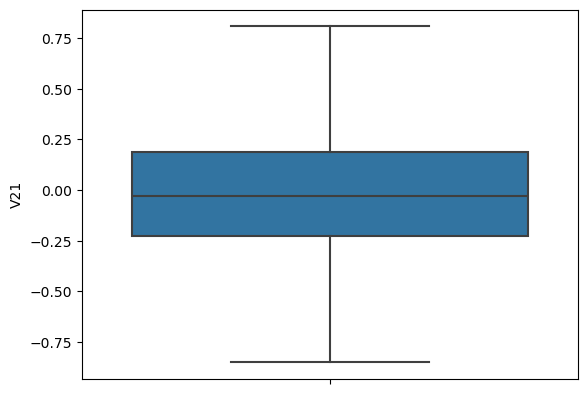

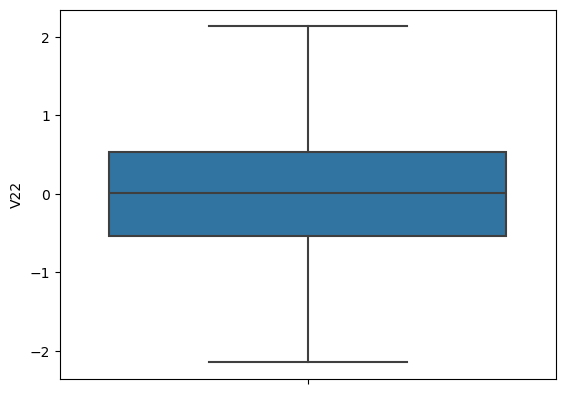

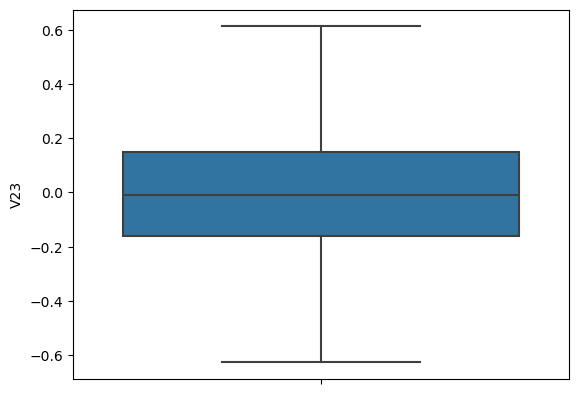

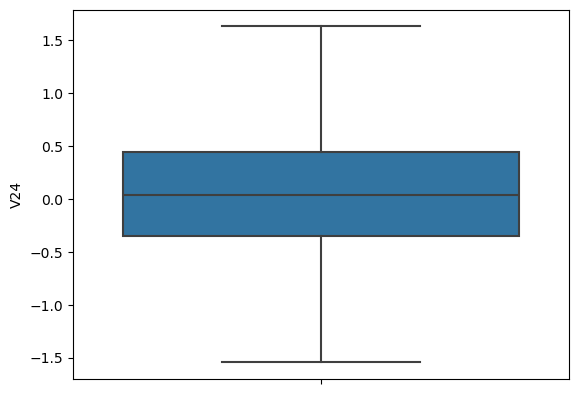

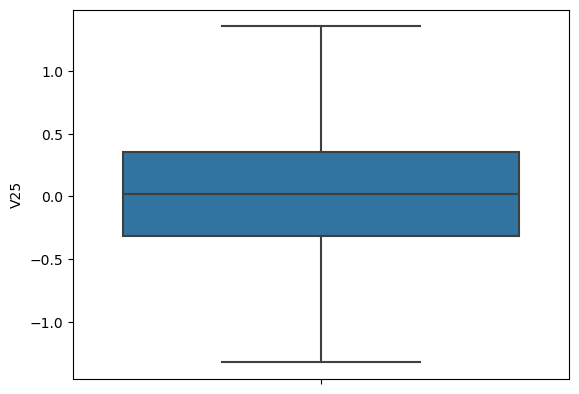

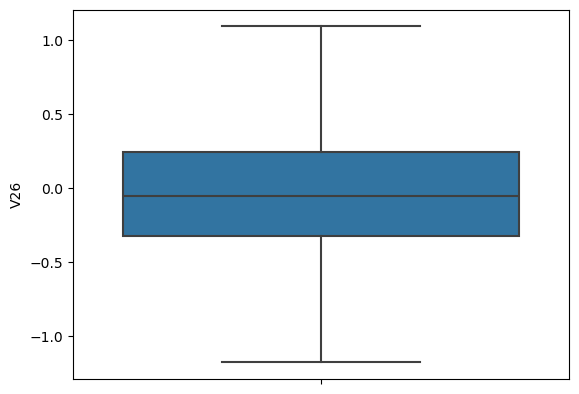

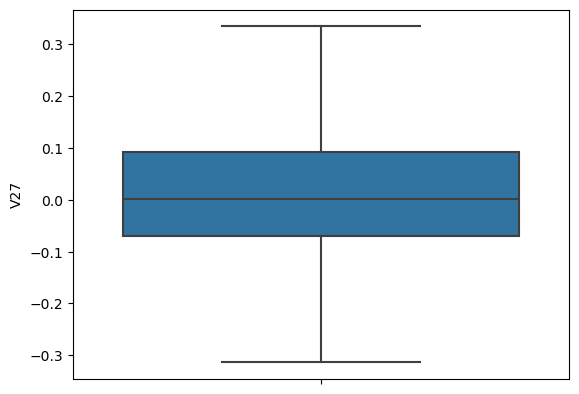

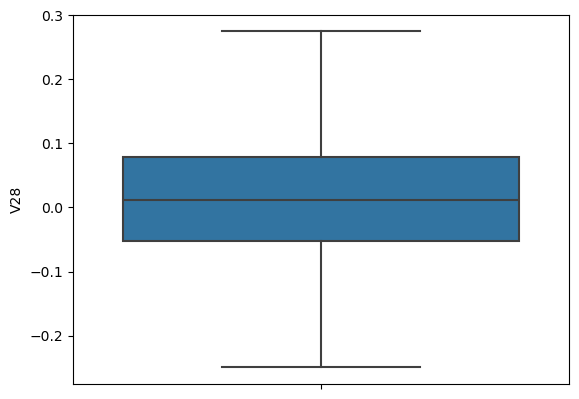

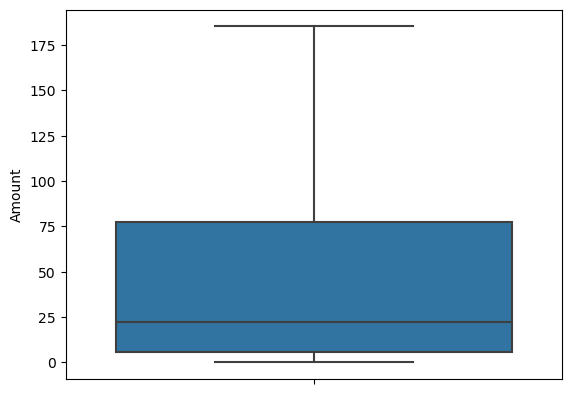

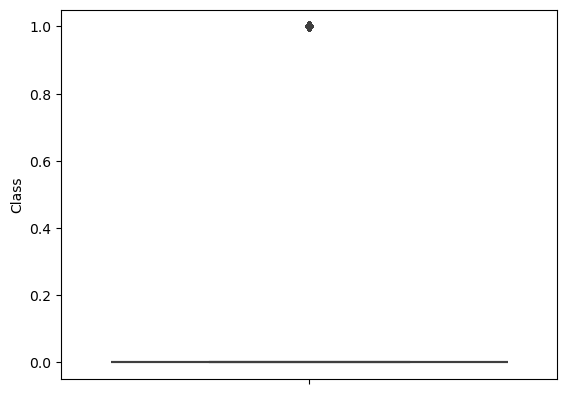

In [15]:
for i in df:
    sns.boxplot(y=df[i])
    plt.show()

<Axes: xlabel='Class', ylabel='count'>

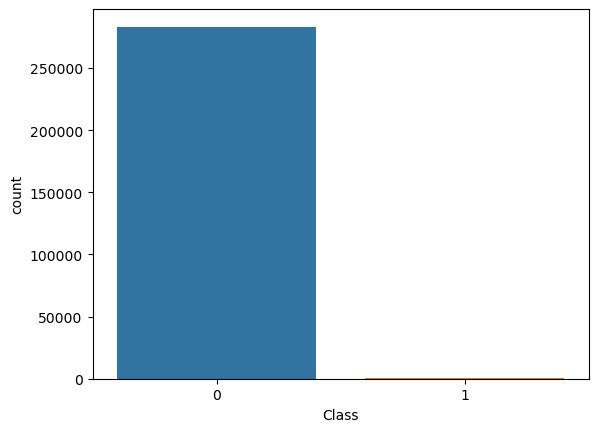

In [16]:
sns.countplot(x='Class', data=df)

#### In the above plot there are over 250000 '0 - class' [non fraud] cases and 473 '1 - class' [fraud] cases due to which the result will tend more towards the non-fraud cases even if it is a fraud case, so we need to treat it properly by selection the same level of both the cases to make more accurate prediction

In [17]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
legit_new = legit.sample(n=473)
df_new = pd.concat([legit_new,fraud],axis=0)

In [18]:
df_new['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

Text(0.5, 1.0, 'Balanced Class count')

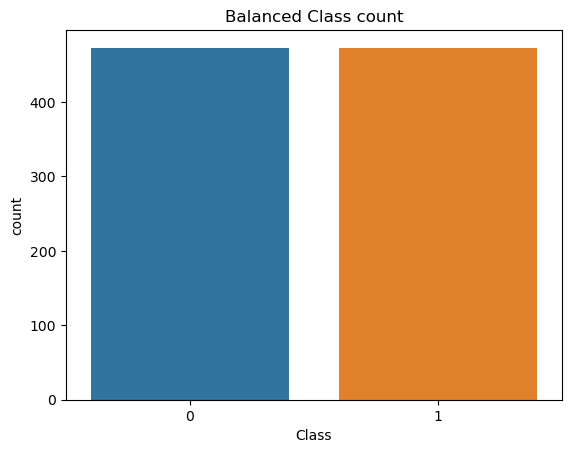

In [19]:
sns.countplot(x='Class', data=df_new)
plt.title('Balanced Class count')

### Coorelation between all the columns

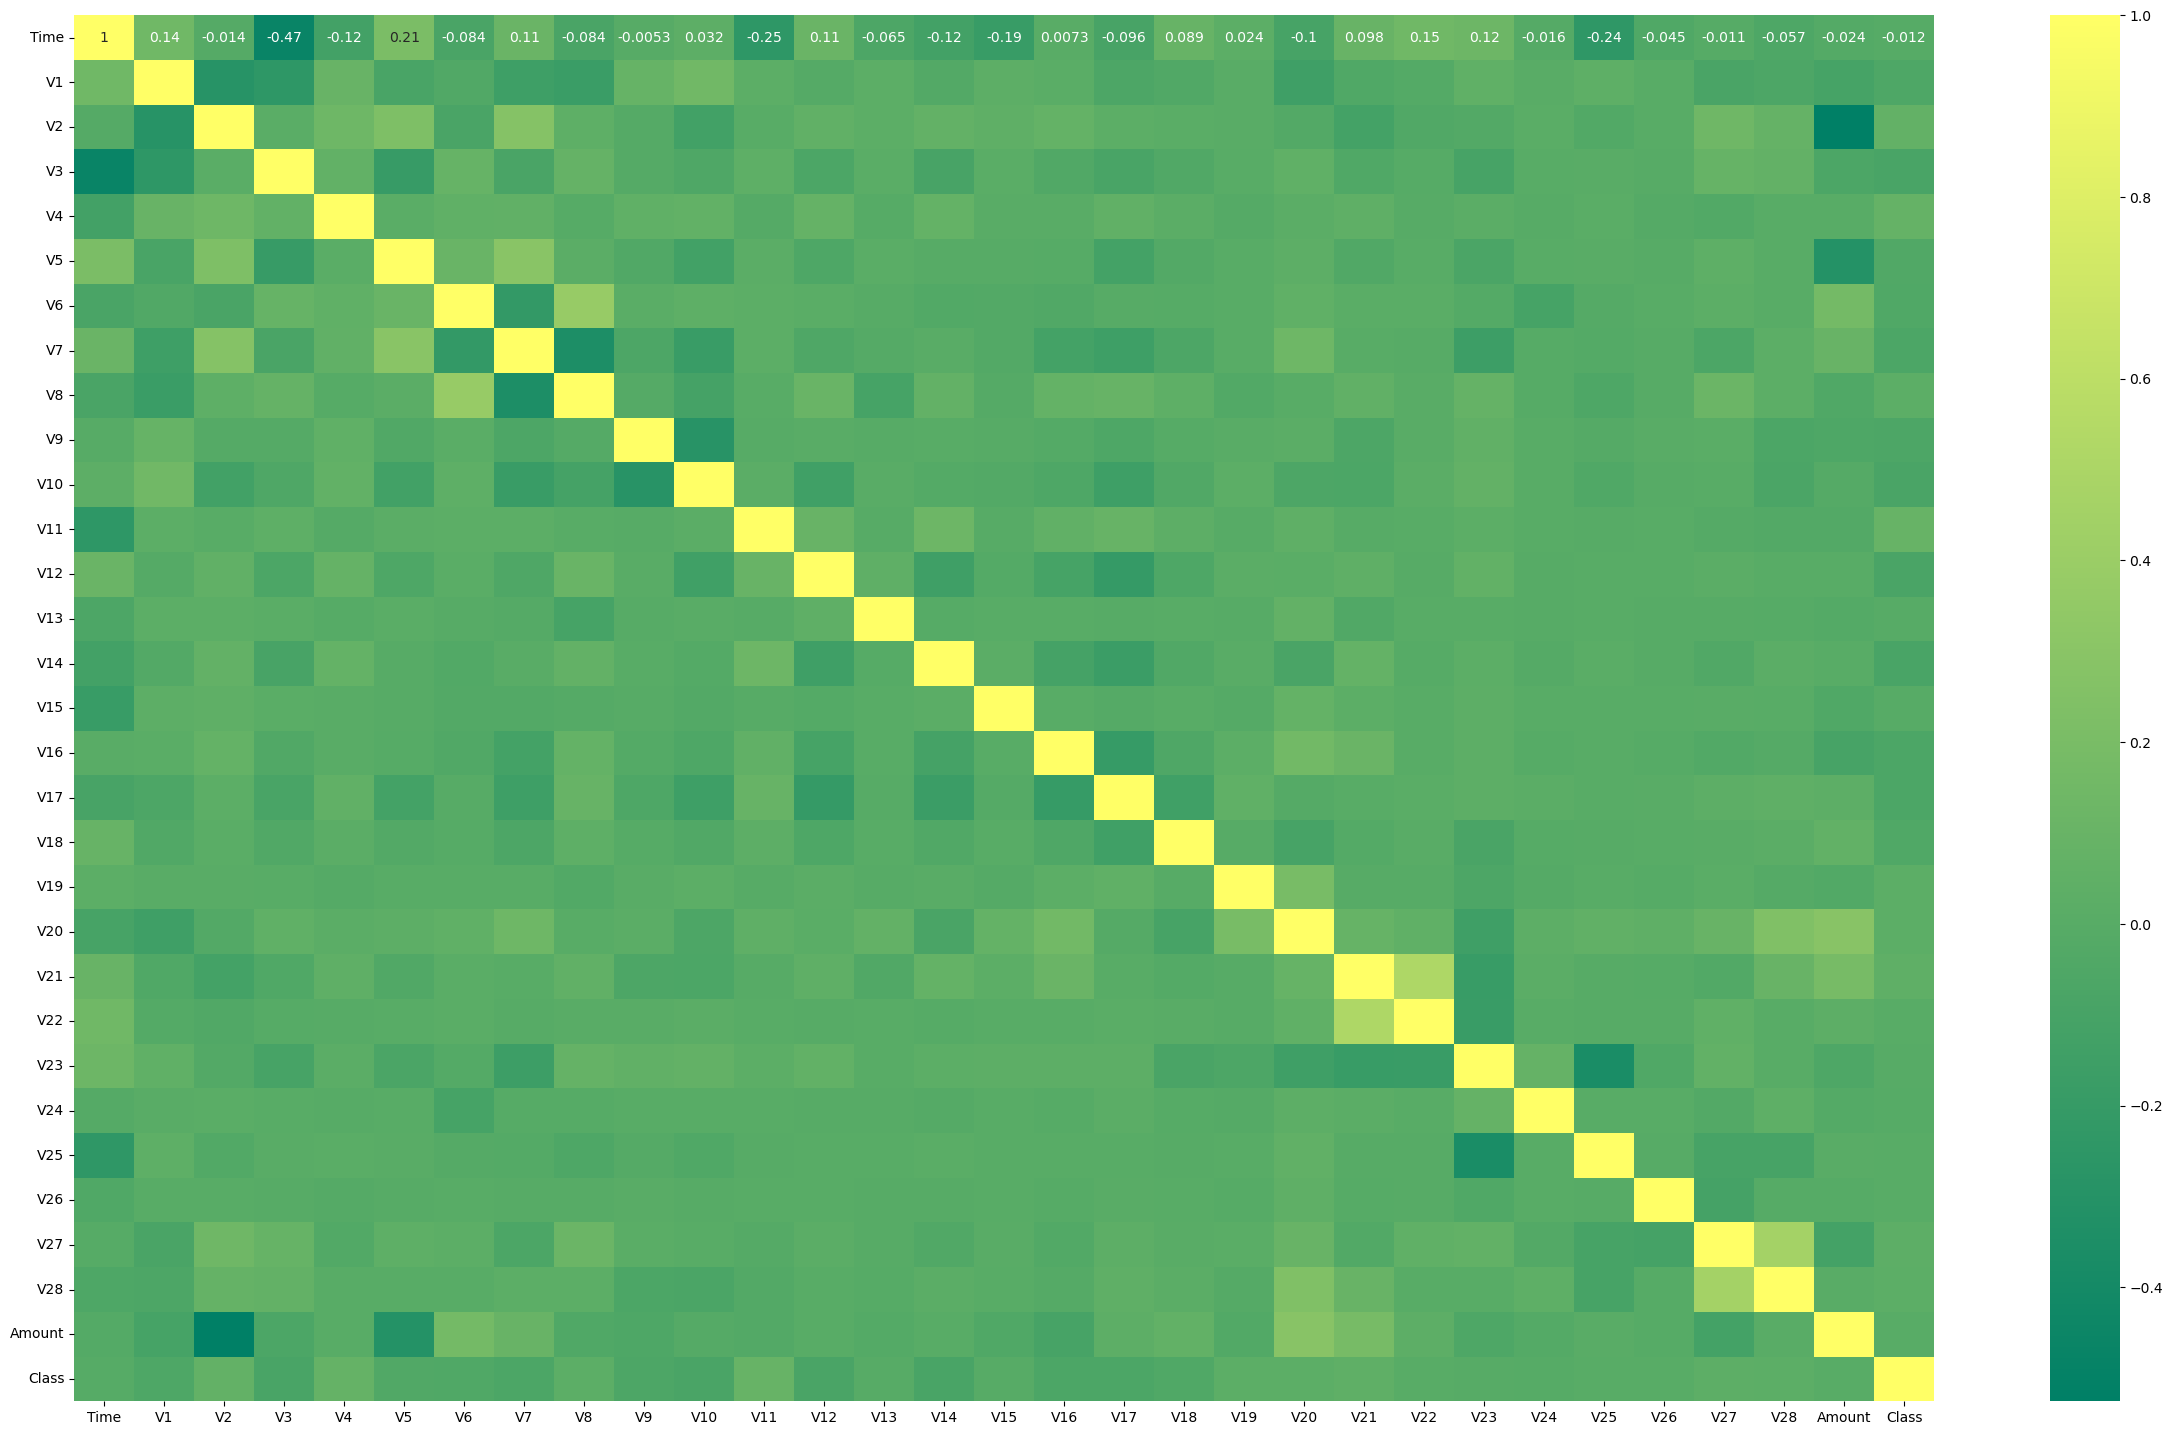

In [20]:
plt.figure(figsize=(30,18))
sns.heatmap(data=df.corr(),cmap='summer',annot=True)
plt.show()

In [21]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,185.375,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-4.263980,2.901188,-3.764645,-2.066656,-2.642901,-2.517765,-2.236984,1.127502,1.914428,...,0.213454,0.111864,0.611926,-0.509348,1.352896,0.250034,0.333982,0.274917,0.770,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.565290,2.145527,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000,0


## Data Splitting

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score

In [29]:
x=df_new.drop("Class",axis=1)
y=df_new[["Class"]]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## Logistic Regression

In [31]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

## Decision Tree Classifier

In [32]:
model_2 = DecisionTreeClassifier(max_depth=3)
model_2.fit(x_train,y_train)
accuracy_score(y_train,model_2.predict(x_train))

0.9561933534743202

## Random Forest Classifier

In [33]:
model_3 = RandomForestClassifier(n_estimators=50,max_depth=6)
model_3.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=50)

# Representation of the results of each model

In [45]:
names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest"
]

models = [
    model_1,model_2,model_3
]

### below is the function which returns the training and testing scores of all the models

In [46]:
def score(X_train, y_train, X_test, y_test, names = names, models = models):
    score_df, score_train, score_test = pd.DataFrame(), [], []
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_test.append(accuracy_score(y_test, y_test_pred))
    
    score_df["Model"], score_df["Training accuracy"], score_df["Testing accuracy"] = names, score_train, score_test
    return score_df

### below is the function call for the scores representation

In [47]:
score(x_train, y_train, x_test, y_test, names = names, models = models)

,Model,Training accuracy,Testing accuracy
0,Logistic Regression,0.938066,0.940141
1,Decision Tree,0.956193,0.926056
2,Random Forest,0.974320,0.933099


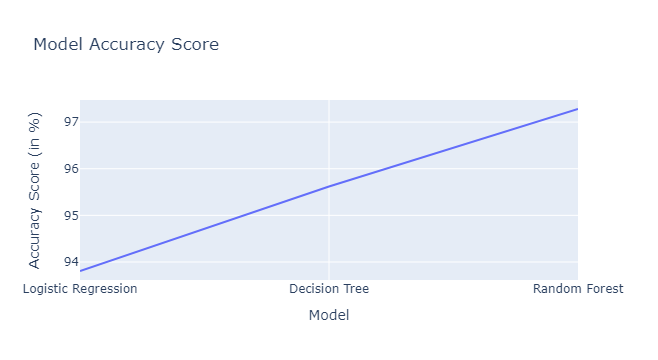

In [49]:
score_res = score(x_train, y_train, x_test, y_test, names = names, models = models)
res = pd.DataFrame({
    'Model':[score_res["Model"][0],score_res["Model"][1],score_res["Model"][2]],
    'Accuracy Score':[score_res["Training accuracy"][0],score_res["Training accuracy"][1],score_res["Training accuracy"][2]],
    'Accuracy Score (in %)':[score_res["Training accuracy"][0]*100,score_res["Training accuracy"][1]*100,score_res["Training accuracy"][2]*100]
    })
res=res.sort_values('Accuracy Score')
px.line(data_frame=res,x=res['Model'],y=res['Accuracy Score (in %)'],title='Model Accuracy Score').show()

### Classification reports of all the models

In [38]:
for i in models:
    predictions = i.predict(x_test)
    print(i,"\n")
    print(classification_report(y_test,predictions))
    print("\n")

LogisticRegression() 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       134
           1       0.95      0.93      0.94       150

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



DecisionTreeClassifier(max_depth=3) 

              precision    recall  f1-score   support

           0       0.90      0.96      0.92       134
           1       0.96      0.90      0.93       150

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



RandomForestClassifier(max_depth=6, n_estimators=50) 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       134
           1       0.98      0.89      0.93       150

    accuracy                           0.93       284
   macro

# Testing on New data 

In [39]:
l = [model_1,model_2,model_3]
for i in l:
    pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',i)])
    pipeline.fit(x, y)
    print(i)
    print('\nNormal cases:')
    data = [[0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62],
     [0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69],
     [1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66]]
    for row in data:
     yhat = pipeline.predict_proba([row])
     result = yhat[0][1]
     print('Predicted=%.3f (expected 0)' % (result))

    print('Fraud cases:')
    data = [[406,-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0],
     [7519,1.23423504613468,3.0197404207034,-4.30459688479665,4.73279513041887,3.62420083055386,-1.35774566315358,1.71344498787235,-0.496358487073991,-1.28285782036322,-2.44746925511151,2.10134386504854,-4.6096283906446,1.46437762476188,-6.07933719308005,-0.339237372732577,2.58185095378146,6.73938438478335,3.04249317830411,-2.72185312222835,0.00906083639534526,-0.37906830709218,-0.704181032215427,-0.656804756348389,-1.63265295692929,1.48890144838237,0.566797273468934,-0.0100162234965625,0.146792734916988,1],
     [7526,0.00843036489558254,4.13783683497998,-6.24069657194744,6.6757321631344,0.768307024571449,-3.35305954788994,-1.63173467271809,0.15461244822474,-2.79589246446281,-6.18789062970647,5.66439470857116,-9.85448482287037,-0.306166658250084,-10.6911962118171,-0.638498192673322,-2.04197379107768,-1.12905587703585,0.116452521226364,-1.93466573889727,0.488378221134715,0.36451420978479,-0.608057133838703,-0.539527941820093,0.128939982991813,1.48848121006868,0.50796267782385,0.735821636119662,0.513573740679437,1]]
    for row in data:
     yhat = pipeline.predict_proba([row])
     result = yhat[0][1]
     print('Predicted=%.3f (expected 1)' % (result))
    print('\n')

LogisticRegression()

Normal cases:
Predicted=0.212 (expected 0)
Predicted=0.027 (expected 0)
Predicted=0.094 (expected 0)
Fraud cases:
Predicted=1.000 (expected 1)
Predicted=1.000 (expected 1)
Predicted=1.000 (expected 1)


DecisionTreeClassifier(max_depth=3)

Normal cases:
Predicted=0.055 (expected 0)
Predicted=0.055 (expected 0)
Predicted=0.055 (expected 0)
Fraud cases:
Predicted=0.993 (expected 1)
Predicted=0.993 (expected 1)
Predicted=0.993 (expected 1)


RandomForestClassifier(max_depth=6, n_estimators=50)

Normal cases:
Predicted=0.045 (expected 0)
Predicted=0.024 (expected 0)
Predicted=0.134 (expected 0)
Fraud cases:
Predicted=0.997 (expected 1)
Predicted=0.989 (expected 1)
Predicted=1.000 (expected 1)




## CONCLUSION:


### => From the above we came to know that overall predictions of all the models were very good but Logistic    Regression was best at it since it was predicting the fraud and non-fraud cases exactly as there were needed to be predicted.
### => If we look at consistency in the results then Decision Tree is best at predicting more consistent results for both normal and fraud cases than any other.